# Lista 4

### Algorytmy i struktury danych

#### Urszula Spik i Natalia Jelito

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

### <span style="color:Crimson"> Zadanie 1 </span>

* koniec kolejki znajduje się na początku listy

In [43]:
class QueueBegin:
    """
    Class with queue where the end of the queue
    is at the top of the list
    """
    def __init__(self):
        """
        Create queue
        """
        self.items = []

    def isEmpty(self):
        """
        Check if queue is empty

        Returns:
            (bool): True if stack is empty, otherwise False
        """
        return not self.items

    def enqueue(self, item):
        """
        Add item to the end of the queue

        Args:
            item: item to add
        """
        self.items.insert(0, item)

    def dequeue(self):
        """
        Delate the item that came first 

        Returns:
            Delated item
        """
        return self.items.pop()

    def size(self):
        """
        Check size of queue

        Returns:
            (int): number of item in queue
        """
        return len(self.items)

    def __str__(self):
        """
        Show queue in str form

        Returns:
            (str): str form of queue
        """
        return str(self.items)


* koniec kolejki znajduje się na końcu listy

In [44]:
class QueueEnd:
    """
    Class with queue where the end 
    of the queue is at the end of the list
    """
    def __init__(self):
        """
        Create queue
        """
        self.items = []

    def isEmpty(self):
        """
        Check if queue is empty
        
        Returns:
            (bool): True if stack is empty, otherwise False
        """
        return not self.items

    def enqueue(self, item):
        """
        Add item to the end of the queue

        Args:
            item: item to add
        """
        self.items.append(item)

    def dequeue(self):
        """
        Delate the item that came first

        Returns:
            Delated item
        """
        return self.items.pop(0)

    def size(self):
        """
        Check size of queue

        Returns:
            (int): number of item in queue
        """
        return len(self.items)

    def __str__(self):
        """
        Show queue in str form

        Returns:
            (str): str form of queue
        """
        return str(self.items)

* Przykład, gdzie koniec kolejki znajduje się na początku listy.

In [45]:
q_begin=QueueBegin()
q_begin.enqueue("jeden")
q_begin.enqueue("2")

In [46]:
q_begin.size()

2

In [47]:
print(q_begin)

['2', 'jeden']


In [48]:
q_begin.isEmpty()

False

In [49]:
q_begin.dequeue()

'jeden'

In [50]:
print(q_begin)

['2']


Działa :)

* Przykład kolejki, gdzie koniec jest na końcu listy.

In [32]:
q_end=QueueEnd()
q_end.enqueue("1")
q_end.enqueue("dwa")

In [33]:
q_end.size()

2

In [34]:
print(q_end)

['1', 'dwa']


In [35]:
q_end.isEmpty()

False

In [36]:
q_end.dequeue()

'1'

In [37]:
print(q_end)

['dwa']


Również działa :)

### <span style="color:Crimson"> Zadanie 2</span>

Sprawdzamy wydajność dodając do kolejki n elementów, a następnie usuwając je.

In [51]:
n=10000
l=QueueBegin()
q=QueueEnd()

<span style="color:pink"> Kolejka z końcem na początku </span>

In [52]:
%%timeit
for i in range(n):
    l.enqueue(random.randint(0,1000000))
for i in range(n):
    l.dequeue()
        

75.9 ms ± 2.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<span style="color:pink"> Kolejka z końcem na końcu </span>

In [53]:
%%timeit
for i in range(n):
    q.enqueue(random.randint(0,1000000))
for i in range(n):
    q.dequeue()

52.2 ms ± 3.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Po zmierzeniu czasu można zauważyć, że druga wersja kolejki (**koniec jest na końcu**) jest szybsza.

Porównajmy teraz dane dotyczące kolejek za pomocą wykresów

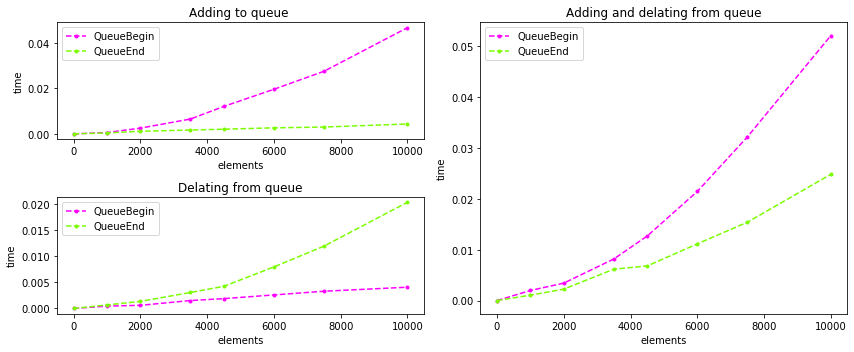

In [54]:
def time_adding(kind, elements = 10000, loops = 100):
    """
    Add number of element to queue,
    and count avarage time of this action
    
    Args:
        kind: kind of queue, 
        it can be QueueBegin or QueueEnd
        elements(int): number of element
        to add to queue
        loops(int): number of loops to count mean
    
    Returns:
        time of adding             
    """
    time_list = []
    for a in range(loops):
        queue = kind()
        start = time.time() 
        for i in range(elements):
            queue.enqueue(i)
        end = time.time() 
        times=end - start
        time_list.append(times)
    times = sum(time_list)/ loops
    return times

def time_delating(kind, elements = 10000, loops = 100):
    """
    Delate number of element form queue,
    and count avarage time of this action
    
    Args:
        kind: kind of queue, 
        it can be QueueBegin or QueueEnd
        elements(int): number of element
        to delate from
        loops(int): number of loops to count mean
    
    Returns:
        time of delating            
    """

    time_list = []
    for a in range(loops):
        queue = kind()
        for i in range(elements):
            queue.enqueue(i)
        start = time.time()
        for i in range(elements):
            queue.dequeue()
        end = time.time()
        times = end - start
        time_list.append(times)
    times = sum(time_list)/ loops
    return times

def time_delating_and_adding(kind, elements = 10000, loops = 100):
    """
    Add and delate number of element form queue,
    and count avarage time of this action
    
    Args:
        kind: kind of queue, 
        it can be QueueBegin or QueueEnd
        elements(int): number of element
        to add and delate from queue
        loops(int): number of loops to count mean
    
    Returns:
        time of adding and delating            
    """
    time_list = []
    for a in range(loops):
        start = time.time()
        queue = kind()
        for i in range(elements):
            queue.enqueue(i)
        for i in range(elements):
            queue.dequeue()
        end = time.time()
        times = end - start
        time_list.append(times)
    times = sum(time_list)/ loops
    return times

numbers = [0, 1000 ,2000, 3500, 4500, 6000, 7500, 10000]
fig  = plt.subplots(figsize=(12, 5))

ax1 = plt.subplot(221)
ax1.plot(numbers, [time_adding(QueueBegin, n) for n in numbers], color='magenta', label = "QueueBegin" , marker = '.', linestyle = '--' )
ax1.plot(numbers, [time_adding(QueueEnd, n) for n in numbers], color="lawngreen", label = "QueueEnd" , marker = '.', linestyle = '--')
ax1.set_title("Adding to queue ")
ax1.legend()
ax1.set_xlabel("elements")
ax1.set_ylabel("time")

ax2 = plt.subplot(223)
ax2.plot(numbers, [time_delating(QueueBegin, n) for n in numbers], color='magenta', label = "QueueBegin" , marker = '.', linestyle = '--' )
ax2.plot(numbers, [time_delating(QueueEnd, n) for n in numbers], color="lawngreen", label = "QueueEnd" , marker = '.', linestyle = '--')
ax2.set_title("Delating from queue")
ax2.legend()
ax2.set_xlabel("elements")
ax2.set_ylabel("time")

ax3 = plt.subplot(122)
ax3.plot(numbers, [time_delating_and_adding(QueueBegin, n) for n in numbers], color='magenta', label = "QueueBegin" , marker = '.', linestyle = '--' )
ax3.plot(numbers, [time_delating_and_adding(QueueEnd, n) for n in numbers], color="lawngreen", label = "QueueEnd" , marker = '.', linestyle = '--')
ax3.set_title("Adding and delating from queue")
ax3.legend()
ax3.set_xlabel("elements")
ax3.set_ylabel("time")

plt.tight_layout()
plt.show()

W ten sposób można wysnuć trzy wnioski:
   * kolejka z końcem na początku jest szybsza w dodawaniu
   * kolejka z końcem na końcu jest szybsza w usuwaniu
   * w zestawieniu zarówno dodania jak i usuwania lepsza jest **kolejka z końcem na końcu**

Zatem docelowo wygrywa kolejka z końcem na końcu

### <span style="color:Crimson"> Zadanie 3 </span>

Kolejka do kas

Założenia:
* wszyscy mają tyle samo zakupów i spędzają tyle samo czasu przy kasie
* osoby pracujące przy kasie są tak samo "szybkie"
* wszyscy idą tak samo szybko do kasy
* gdy mamy więcej kas ludzie ustawiają się do nich w sposób losowy


Pytanie:
Co będzie lepsze - jedna kolejka do wszystkich kas, czy osobne kolejki do każdej z kas

* jedna kolejka

In [315]:
def onequeue(people, queues):
    """
    One queue to all cash
    People has only one thing to buy
    
    Args:
        people(int): number of people
        queues(int): number of queues
    
    Returns:
        (int): time to end queues
    """
    time = 0
    queue = QueueEnd()
    for i in range(people):
        queue.enqueue(1)
    while not queue.isEmpty():
        time +=1
        for i in range(queues):
            if not queue.isEmpty():
                queue.dequeue()
    return time

In [316]:
onequeue(200, 3)

67

* więcej kolejek

In [318]:
def morequeue(people, queues):
    """
    More queues to cash
    People has only one thing to buy
    People go to cash in random way
    
    Args:
        people(int): number of people
        queues(int): number of queues
    
    Returns:
        (int): time to end queues
    """
    time = 0
    allqueue = []
    for i in range(queues):
        allqueue.append(QueueEnd())
    for i in range(people):
        myqueue = random.choice(allqueue)
        myqueue.enqueue(1)
    while allqueue != []:
        time += 1
        for i in allqueue:
            if not i.isEmpty():
                i.dequeue()
            else:
                allqueue.remove(i)
    return time

In [319]:
morequeue(200, 3)

72

Skuteczność kolejki określamy na podstawie, czy jest ona conajmniej tak samo szybka jak druga wersja

In [321]:
result1 = []
result2 = []
max_people = 1000
max_cash = 15
for i in range(1000):
    people = random.randint(1, max_people)
    cash = random.randint(2, max_cash)
    queue1 = onequeue(people, cash)
    queue2 = morequeue(people, cash)
    result1.append(queue1 <= queue2)
    result2.append(queue1 >= queue2)
print(f'Jedna kolejka jest lepsza: {sum(result1)/len(result1)*100}%')
print(f'Wiele kolejek jest lepszych: {sum(result2)/len(result2)*100}%')

Jedna kolejka jest lepsza: 100.0%
Wiele kolejek jest lepszych: 0.0%


W tym wypadku zdecydowanie lepsza jest jedna kasa

<strong>Wersja druga - przydzielmy ludziom zakupy</strong>

* liczba posiadanych zakupów wynosi od 1 do 10
* przy jednym przejściu przez pętle znika jeden z zakupów z każdej z kas
* przy większej ilości kas ludzie wybierają tą w której jest najmniej rzeczy

In [322]:
def mypeople(number, things=10):
    """
    Create two queues of people
    with number of things
    
    Args:
        number(int): number of people
        things(int): number of things
    
    Returns:
        (tuple): two queues
    """
    people1 = QueueEnd()
    people2 = QueueEnd()
    for i in range(number):
        rand = random.randint(1, things)
        people1.enqueue(rand)
        people2.enqueue(rand)
    return (people1, people2)

In [323]:
def onequeue_2(people, cash):
    """
    One queue to all cash
    People has more than one thing to buy
    
    Args:
        people(queue_fifo): queue of people
        cash(int): number of cash
    
    Returns:
        (int): time to end queues
    """
    allcash = []
    time = 0
    for i in range(cash):
        allcash.append(QueueEnd())
    while not people.isEmpty():
        time +=1
        for cash in allcash:
            if cash.isEmpty():
                if people.isEmpty():
                    break
                first = people.dequeue()
                for i in range(first):
                    cash.enqueue(1)
            if not cash.isEmpty():
                    cash.dequeue()
    while allcash != []:
        time +=1
        for cash in allcash:
            if not cash.isEmpty():
                cash.dequeue()
            if cash.isEmpty():
                allcash.remove(cash)
    return time
    

In [325]:
def morequeue_2(people, cash):
    """
    More queues to cash
    People has more one thing to buy
    People go to the cash where people
    has least things.
    
    Args:
        people(queue_fifo): queue of people
        cash(int): number of cash
    
    Returns:
        (int): time to end queues
    """
    allcash = []
    time = 0
    for i in range(cash):
        allcash.append(QueueEnd())
    while not people.isEmpty():
        size = []
        for cash in allcash:
            size.append(cash.size())
        first = people.dequeue()
        for things in range(first):
            allcash[size.index(min(size))].enqueue(1)
    while allcash != []:
        time +=1
        for cash in allcash:
            if not cash.isEmpty():
                cash.dequeue()
            if cash.isEmpty():
                allcash.remove(cash)
    return time

In [327]:
result1 = []
result2 = []
diff = []
max_people = 1000
max_cash = 15
for i in range(1000):
    people = mypeople(max_people)
    cash = random.randint(2, max_cash)
    queue1 = onequeue_2(people[0], cash)
    queue2 = morequeue_2(people[1], cash)
    result1.append(queue1 <= queue2)
    result2.append(queue1 >= queue2)
    diff.append(abs(queue1 - queue2))
print(f'Jedna kolejka jest lepsza: {sum(result1)/len(result1)*100}%')
print(f'Wiele kolejek jest lepszych: {sum(result2)/len(result2)*100}%')
print(f'Średnia różnica: {sum(diff)/len(diff)}')

Jedna kolejka jest lepsza: 86.4%
Wiele kolejek jest lepszych: 95.6%
Średnia różnica: 0.194


Gdyby klienci ustawiali się dokładnie tam gdzie jest najmniej produktów wtedy szybsza byłaby wersjaz **wieloma kasami** (chociaż niewiele), jednak ciężko by ludzkie oko było aż tak dokładne w ocenie ilości produktów.

Przymijmy więc, że ludzie trafiają w poprawną kolejkę z prawdopodobieństwem 80%

In [328]:
def morequeue_3(people, cash, p = 0.8):
    """
    More queues to cash
    People has more one thing to buy
    People go to the cash where people
    has least things.
    
    Args:
        people(queue_fifo): queue of people
        cash(int): number of cash
    
    Returns:
        (int): time to end queues
    """
    allcash = []
    time = 0
    for i in range(cash):
        allcash.append(QueueEnd())
    while not people.isEmpty():
        size = []
        for cash in allcash:
            size.append(cash.size())
        first = people.dequeue()
        result = random.choices([True, False], weights=(p, 1 - p))[0]
        if result or len(allcash) == 1:
            for things in range(first):
                allcash[size.index(min(size))].enqueue(1)
        else:
            queues = [i for i in allcash if i != allcash[size.index(min(size))]]
            newcash = random.choice(queues)
            for things in range(first):
                newcash.enqueue(1)
    while allcash != []:
        time +=1
        for cash in allcash:
            if not cash.isEmpty():
                cash.dequeue()
            if cash.isEmpty():
                allcash.remove(cash)
    return time

In [329]:
result1 = []
result2 = []
diff = []
max_people = 1000
max_cash = 15
for i in range(1000):
    people = mypeople(max_people)
    cash = random.randint(1, max_cash)
    queue1 = onequeue_2(people[0], cash)
    queue2 = morequeue_3(people[1], cash)
    result1.append(queue1 <= queue2)
    result2.append(queue1 >= queue2)
    diff.append(abs(queue1 - queue2))
print(f'Jedna kolejka jest lepsza: {sum(result1)/len(result1)*100}%')
print(f'Wiele kolejek jest lepszych: {sum(result2)/len(result2)*100}%')
print(f'Średnia różnica: {sum(diff)/len(diff)}')

Jedna kolejka jest lepsza: 79.9%
Wiele kolejek jest lepszych: 46.400000000000006%
Średnia różnica: 2.32


Tu widać, że gdyby trafiali poprawnie już aż z 80% szansą w kolejkę z najmniejszą ilością zakupów to skuteczność wielu kas w porównaniu z jedną kasą by widocznie spadła, dlatego warto stworzyć **jedną kolejkę do wszystkich kas**.

### <span style="color:Crimson"> Zadanie 4 </span>

Implementacja stosu (wersja z wykładu)

In [2]:
class Stack_4:
    def __init__(self):
        """
        Create stack
        """
        self.items = []
        
    def isEmpty(self):
        """
        Check if stack is empty

        Returns:
            (bool): True if stack is empty, otherwise False
        """
        return self.items == []
    
    def push(self, item):
        """
        Add item to the end

        Args:
            item: item to add
        """
        self.items.append(item)
        
    def pop(self):
        """
        Delate last item

        Returns:
            Delated item
        """
        return self.items.pop()
    
    def peek(self):
        """
        Return last item
        
        Returns:
            Last item
        """
        return self.items[len(self.items)-1]
    
    def size(self):
        """
        Check size of stack
        
        Returns:
            (int): Size of stack
        """
        return len(self.items)
    
    def __str__(self):
        """
        Show str form of stack
        
        Returns:
            (str): str from stack
        """
        return str(self.items)

Funkcja check_html bazuje na dwóch stosach. Pierwszy z nich (s) odpowiada za sprawdzenie czy każdy znacznik <.> ma swoje domknięcie </.>. Drugi (brackets) sprawdza czy każdy "<" ma odpowiadający ">". Składnia będzie poprawna, gdy oba stosy po wykonaniu programu będą puste.

In [99]:
def ignore_comments(list):
    """Deletes html comments from list for further analysys

    Args:
        list (list): list of signs read from html file

    Returns:
        [list]: list of signs without comments
    """
    start_com = [i for i in range(len(list)) if list[i:i+4]==["<","!", "-", "-"]]
    stop_com = [i+3 for i in range(len(list)) if list[i:i+3]==[ "-", "-", ">"]]
    stop_com.insert(0,0)
    start_com.append(len(list))
    temp_list = []
    
    for i in range(len(start_com)):
        temp_list += list[stop_com[i]:start_com[i]] 
    return temp_list

def check_html(html_file):
    """Checks if every opening tag has prper closing tag and angle brackets are balanced.

    Args:
        html_file (str): name of html file

    Returns:
        (bool): True if everything is balanced, otherwise False
    """
    s = Stack_4()
    no_closure = ["area", "base", "embed", "param","keygen","menuitem", "source", "track", "wbr","!DOCTYPE","br","meta", "link", "img","col", "command","hr","input"]

    with open(html_file,'r', encoding="utf-8") as f:
        t = list(f.read())
    
    t1= ignore_comments(t)
    brackets = Stack_4()
    for i in range(len(t1)):
        if t1[i] == "<":
            brackets.push("<")
            i+=1
            content = ""
            while t1[i] != ">":
                content += t1[i]
                i+=1
            content = content.split(" ")[0]
            if s.isEmpty() and (content not in no_closure):
                s.push(content)
            else:
                if content in no_closure:
                    pass
                elif content == "/" + s.peek():
                    s.pop()
                else:
                    s.push(content)
        elif t1[i] == ">":
            if brackets.peek() == "<":
                brackets.pop()
    if s.isEmpty() and brackets.isEmpty() :
        print("everything is ok")
        return True
    elif brackets.isEmpty():
        print("Tag is not closed!")
        return False
    else:
        print("Missing '<' or '>' sign")
        return False

**Test:**

In [87]:
check_html("t1.html")

everything is ok


True

Działa :)

Uwzględnia nawet komentarze w pliku ;)

### <span style="color:Crimson"> Zadanie 5</span>

Dodaj brakujace metody do klasy UnorderedList prezentowanej na
wykładzie.

In [251]:
class Node:
    def __init__(self,initdata):
        """
        Create Node
        
        Args:
            initdata: Node data
        """
        self.data = initdata
        self.next = None

    def getData(self):
        """
        Give value of our data
        """
        return self.data

    def getNext(self):
        """
        Give value of next data
        """
        return self.next

    def setData(self,newdata):
        """
        Set new value of data

        Args: 
            New value
        """
        self.data = newdata

    def setNext(self,newnext):
        """
        Set new value of next data

        Args: 
            New value
        """
        self.next = newnext
        
class UnorderedList:

    def __init__(self):
        """
        Create list
        """
        self.head = None

    def isEmpty(self):
        """
        Check if list is empty

        Returns:
            (bool): True - is empty
        """
        return self.head == None

    def add(self,item):
        """
        Add element to the begining of the list
        """
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp

    def size(self):
        """
        Check size of list

        Returns:
            (int): size of list
        """
        current = self.head
        count = 0
        while current != None:
            count = count + 1
            current = current.getNext()

        return count

    def search(self,item):
        """
        Check if item is on the list

        Args:
            item: item to check

        Returns:
            (bool): True - found
        """
        current = self.head
        found = False
        while current != None and not found:
            if current.getData() == item:
                found = True
            else:
                current = current.getNext()

        return found

    def remove(self,item):
        """
        Remove item form the list

        Args:
            item: item to remove
        """
        current = self.head
        previous = None
        found = False
        while not found:
            if current.getData() == item:
                found = True
            else:
                previous = current
                current = current.getNext()

        if previous == None:                  
            self.head = current.getNext()
        else:
            previous.setNext(current.getNext())

    def append(self, item):
        """
        Add element to the end of the list
        """
        current = self.head
        temp = Node(item)

        if self.isEmpty():
            self.add(item)
        else:
            while current.getNext() != None:
                current = current.getNext()
            current.setNext(temp)
            
    def index(self, item):
        """
        Find index of first found item
        
        Args:
            item: item with index to find
        
        Returns:
            (int): index of item, if item
            is not in list - return None
        """
        current = self.head
        index = 0

        while current != None:
            if current.getData() == item:
                return index
            else:
                index += 1
                current = current.getNext()
        raise ValueError("Element is not in list!")

    def insert(self, pos, item):
        """
        Put item to certain position
        
        Args:
            pos(int): position
            item: element to put
        """
        current = self.head
        temp = Node(item)
        index = 0
        previous = None
        size = self.size()

        if pos > size or pos < -size-1:
            raise IndexError("Wrong position!")

        elif pos == 0 or pos == -size-1:
            self.add(item)

        else:
            if pos < 0:
                pos = pos + size + 1

            while index < pos:
                previous = current
                current = current.getNext()
                index += 1

            previous.setNext(temp)
            temp.setNext(current)
    
    def pop(self, pos = -1):
        """
        Remove item from list
        
        Args:
            (int)pos: position to remove
        
        Returns: 
            Removed item
        """
        current = self.head
        previous = None
        index = 0
        size = self.size()

        if self.isEmpty():
            raise IndexError("Empty list, nothing to pop")
        elif pos >= size or pos < -size:
            raise IndexError("Wrong position")

        elif size == 1:
            self.head = None
            return current.getData()
        else:
            if pos < 0:
                pos = pos + size

            while index < pos:
                previous = current
                current = current.getNext()
                index += 1
            
            if previous is None:
                self.head = current.getNext()
                return current.getData()
            else:
                previous.setNext(current.getNext())
                return current.getData()

    def peek(self):
        """
        Find last element of list
        
        Returns:
            Last element of list
        """
        current = self.head
        previous = None

        if self.isEmpty():
            raise IndexError("Empty list!")

        while current != None:
            previous = current
            current = current.getNext()
        return previous.getData()

    def __str__(self):
        """
        Str form of list
        """
        current = self.head
        mylist = '['
        while current != None:
            mylist += f'{current.getData()}, '
            current = current.getNext()
        if len(mylist) != 1:
            mylist=mylist[:-2]
        return mylist+"]"


In [274]:
mylist = UnorderedList()

**A teraz szybie testy**

* Test append

In [257]:
mylist.append(1)
mylist.append(2)
mylist.append(3)
mylist.append(4)
mylist.append(5)

In [258]:
print(mylist)

[1, 2, 3, 4, 5]


Jest super ;)

* Test pop

In [259]:
mylist.pop(0)

1

In [260]:
print(mylist)

[2, 3, 4, 5]


In [261]:
mylist.pop()

5

In [262]:
print(mylist)

[2, 3, 4]


In [263]:
mylist.pop(-3)

2

In [264]:
print(mylist)

[3, 4]


In [265]:
mylist.pop(2)

IndexError: Wrong position

In [266]:
mylist.pop(1)

4

In [267]:
print(mylist)

[3]


In [268]:
mylist.pop(-1)

3

In [269]:
print(mylist)

[]


In [270]:
mylist.pop()

IndexError: Empty list, nothing to pop

Działa ;)

* Test index

In [ ]:
mylist = UnorderedList()

In [276]:
mylist.append(1)
mylist.append(2)
mylist.append(3)
mylist.append(4)
mylist.append(5)

In [277]:
print(mylist)

[1, 2, 3, 4, 5]


Nie ma elementu w liście

In [278]:
print(mylist.index(0))

ValueError: Element is not in list!

Efekt mamy taki sam jak w przypadku listy pythonowej

In [280]:
mylist.index(1)

0

In [281]:
mylist.index(3)

2

In [282]:
mylist.index(4)

3

Działa ;)

* Test insert

In [283]:
mylist.insert(0, "a")

In [284]:
print(mylist)

[a, 1, 2, 3, 4, 5]


In [285]:
mylist.insert(-2, "b")

In [286]:
print(mylist)

[a, 1, 2, 3, 4, b, 5]


In [287]:
mylist.insert(-9, "b")

IndexError: Wrong position!

In [294]:
mylist.insert(7, "c")

In [295]:
print(mylist)

[a, 1, 2, 3, 4, b, 5, c]


Działa ;)

Metoda która nie była podana, ale jest użyteczna - peek

In [296]:
mylist.peek()

'c'

In [297]:
print(mylist)

[a, 1, 2, 3, 4, b, 5, c]


### <span style="color:Crimson"> Zadanie 6 </span>

Wersja z wykładu:

In [298]:
class Stack_6_1:
    def __init__(self):
        """
        Create stack
        """
        self.items = []

    def isEmpty(self):
        """
        Check if stack is empty

        Returns:
            (bool): True if stack is empty, otherwise False
        """
        return self.items == []

    def push(self, item):
        """
        Add item to the end

        Args:
            item: item to add
        """
        self.items.append(item)

    def pop(self):
        """
        Delate last item

        Returns:
            Delated item
        """
        return self.items.pop()

    def peek(self):
        """
        Return last item
        
        Returns:
            Last item
        """
        return self.items[len(self.items)-1]

    def size(self):
        """
        Check size of stack
        
        Returns:
            (int): Size of stack
        """
        return len(self.items)

    def __str__(self):
        """
        Show str form of stack
        
        Returns:
            (str): str from stack
        """
        return str(self.items)

**Wersja z wykorzystaniem listy z zad 5**

In [299]:
class Stack_6_2:
    def __init__(self):
        """
        Create stack
        """
        self.items = UnorderedList()

    def isEmpty(self):
        """
        Check if stack is empty

        Returns:
            (bool): True if stack is empty, otherwise False
        """
        return self.items.isEmpty()

    def push(self, item):
        """
        Add item to the end

        Args:
            item: item to add
        """
        self.items.append(item)

    def pop(self):
        """
        Delate last item

        Returns:
            Delated item
        """
        return self.items.pop()

    def size(self):
        """
        Check size of stack
        
        Returns:
            (int): Size of stack
        """
        return self.items.size()

    def peek(self):
        """
        Return last item
        
        Returns:
            Last item
        """
        return self.items.peek()
        
    def __str__(self):
        """
        Show str form of stack
        
        Returns:
            (str): str from stack
        """
        return str(self.items)

Przykład działania

In [301]:
q = Stack_6_2()

In [302]:
q.isEmpty()

True

In [303]:
q.push("1")
q.push("2")
q.push("3")
q.push("4i")
q.push("58")

In [304]:
q.peek()

'58'

In [305]:
q.pop()

'58'

In [306]:
print(q)

[1, 2, 3, 4i]


### <span style="color:Crimson"> Zadanie 7 </span>

Kolejka dwustronna (bezpośrednio z wykładu)

In [307]:
class Deque_7_1:
    def __init__(self):
        """
        Create dequeue
        """
        self.items = []

    def isEmpty(self):
        """
        Check if deque is empty

        Returns:
            (bool): True if deque is empty, otherwise False
        """
        return self.items == []

    def addFront(self, item):
        """
        Add item to begining
        """
        self.items.append(item)

    def addRear(self, item):
        """
        Add item to the end
        """
        self.items.insert(0,item)

    def removeFront(self):
        """
        Remove item from begin
        
        Returns:
            Removed item
        """
        return self.items.pop()

    def removeRear(self):
        """
        Remove item from the end
        
        Returns:
            Removed item
        """
        return self.items.pop(0)

    def size(self):
        """
        Check size of deque
        
        Returns:
            (int): size
        """
        return len(self.items)

**Wersja z wykorzystaniem listy z zad 5**

In [308]:
class Deque_7_2:
    def __init__(self):
        """
        Create dequeue
        """
        self.items = UnorderedList()

    def isEmpty(self):
        """
        Check if deque is empty

        Returns:
            (bool): True if deque is empty, otherwise False
        """
        return self.items.isEmpty()

    def addFront(self, item):
        """
        Add item to begining
        """
        self.items.add(item)
    
    def addRear(self, item):
        """
        Add item to the end
        """
        self.items.append(item)
        
    def removeFront(self):
        """
        Remove item from begin
        
        Returns:
            Removed item
        """
        return self.items.pop(0)

    def removeRear(self):
        """
        Remove item from the end
        
        Returns:
            Removed item
        """
        return self.items.pop()
        
    def size(self):
        """
        Check size of deque
        
        Returns: 
            (int): size
        """
        return self.items.size()

    def __str__(self):
        """
        Str form of deque
        
        Returns: 
            (str): str form
        """
        return str(self.items)

Przykład działania:

In [309]:
d = Deque_7_2()
d.isEmpty()

True

In [310]:
d.addFront("1")
d.addFront("2")
d.addRear("3")
print(d)

[2, 1, 3]


In [113]:
d.removeFront()

'2'

In [114]:
d.removeRear()

'3'

In [115]:
d.size()

1

### <span style="color:Crimson"> Zadanie 8 </span>

Spardzam wydajność dodawając i usuwając n elementów.

In [311]:
n = 100
a = []
b = UnorderedList()

In [312]:
%%timeit
for k in range(n):
    for i in range(n):
        a.append(random.randint(1, 1000000))
    for i in range(n):
        a.pop()

11.2 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [313]:
%%timeit
for k in range(n):
    for i in range(n):
        b.append(random.randint(1, 1000000))
    for i in range(n):
        b.pop()

314 ms ± 20 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Lista pythonowa jest szybsza

Teraz, porównajmy dane za pomocą wykresów

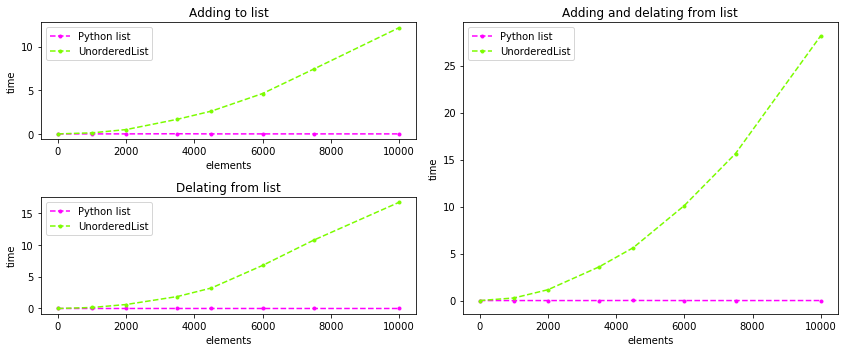

In [314]:
def time_adding_list(kind, elements = 10000):
    """
    Add number of element to list,
    and count time of this action
    
    Args:
        kind: kind of list, 
        it can be list or UnorderedList
        elements(int): number of element
        to add to list
    
    Returns:
        time of adding             
    """
    ourlist = kind()
    start = time.time() 
    for i in range(elements):
        ourlist.append(i)
    end = time.time() 
    add_time=end - start
    return add_time

def time_delating_list(kind, elements = 10000):
    """
    Delate number of element form list,
    and count time of this action
    
    Args:
        kind: kind of list,
        it can be list or UnorderedList
        elements(int): number of element
        to delate from
    
    Returns:
        time of delating            
    """
    ourlist = kind()
    for i in range(elements):
        ourlist.append(i)
    start = time.time()
    for i in range(elements):
        ourlist.pop()
    end = time.time()
    times=end - start
    return times

def time_delating_and_adding_list(kind, elements = 10000):
    """
    Add and delate number of element form lisr,
    and count time of this action
    
    Args:
        kind: kind of list, 
        it can be list or UnorderedList
        elements(int): number of element
        to add and delate from list
    
    Returns:
        time of adding and delating            
    """
    start = time.time()
    ourlist = kind()
    for i in range(elements):
        ourlist.append(i)
    for i in range(elements):
        ourlist.pop()
    end = time.time()
    times = end - start
    return times

numbers = [0, 1000 ,2000, 3500, 4500, 6000, 7500, 10000]
fig  = plt.subplots(figsize=(12, 5))

ax1 = plt.subplot(221)
ax1.plot(numbers, [time_adding_list(list, n) for n in numbers], color='magenta', label = "Python list" , marker = '.', linestyle = '--' )
ax1.plot(numbers, [time_adding_list(UnorderedList, n) for n in numbers], color="lawngreen", label = "UnorderedList" , marker = '.', linestyle = '--')
ax1.set_title("Adding to list")
ax1.legend()
ax1.set_xlabel("elements")
ax1.set_ylabel("time")

ax2 = plt.subplot(223)
ax2.plot(numbers, [time_delating_list(list, n) for n in numbers], color='magenta', label = "Python list" , marker = '.', linestyle = '--' )
ax2.plot(numbers, [time_delating_list(UnorderedList, n) for n in numbers], color="lawngreen", label = "UnorderedList" , marker = '.', linestyle = '--')
ax2.set_title("Delating from list")
ax2.legend()
ax2.set_xlabel("elements")
ax2.set_ylabel("time")

ax3 = plt.subplot(122)
ax3.plot(numbers, [time_delating_and_adding_list(list, n) for n in numbers], color='magenta', label = "Python list" , marker = '.', linestyle = '--' )
ax3.plot(numbers, [time_delating_and_adding_list(UnorderedList, n) for n in numbers], color="lawngreen", label = "UnorderedList" , marker = '.', linestyle = '--')
ax3.set_title("Adding and delating from list")
ax3.legend()
ax3.set_xlabel("elements")
ax3.set_ylabel("time")

plt.tight_layout()
plt.show()

Widać wyraźnie, że lista pythonowa jest szybsza (co nie jest w sumie zaskoczeniem).